In [1]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

idx = pd.IndexSlice
data_fol = r"..\data_files"

In [2]:
X_path = os.path.join(data_fol, 'bow_model', "bow_X_train_scaled_pca.pkl")
y_path = os.path.join(data_fol, 'bow_model', "bow_y_train.pkl")

X = pd.read_pickle(X_path)
y = pd.read_pickle(y_path)

In [3]:
from sklearn.svm import SVR, SVC
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [4]:
y.head()

tid
1361890179951296512      3.25
1358354354462289920    165.00
1363916379519336448      0.00
1369296990782320648     31.00
1369559005811662851      0.00
Name: all_engagement, dtype: float64

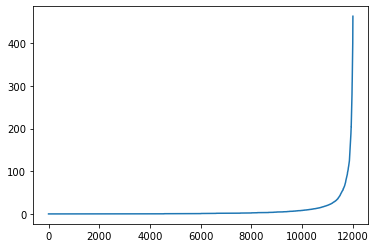

In [5]:
plt.plot(y.sort_values(ascending=True).values)
plt.show()

In [6]:
y.describe()

count    12009.000000
mean         8.291177
std         29.330109
min          0.000000
25%          0.000000
50%          0.750000
75%          4.500000
max        463.250000
Name: all_engagement, dtype: float64

In [7]:
np.percentile(y.values, [75, 95])

array([ 4.5 , 35.25])

In [8]:
def map_categories(x):
    if x < 1:
        return "zero"
    elif 1 <= x < 4.5:
        return "low"
    elif 4.5 <= x <= 35.25:
        return "med"
    else:
        return "high"
    

In [9]:
y_cat = y.apply(lambda x: map_categories(x))

In [10]:
y_cat.value_counts()

zero    6015
low     2991
med     2403
high     600
Name: all_engagement, dtype: int64

#### Support Vector Classification

In [55]:
svc = SVC(C=.6, kernel='rbf')
svc.fit(X, y_cat)
labels = svc.predict(X)

In [56]:
labels

array(['zero', 'zero', 'zero', ..., 'zero', 'zero', 'zero'], dtype=object)

In [57]:
results = y_cat.to_frame()
results['labels'] = labels
pd.crosstab(results.all_engagement, results.labels)

labels,low,med,zero
all_engagement,,,
high,13,123,464
low,100,100,2791
med,23,479,1901
zero,6,67,5942


In [ ]:
svc = SVC(C=.6, kernel='rbf', class_weight='balanced')
svc.fit(X, y_cat)
labels = svc.predict(X)

In [58]:
param_distributions = dict(C=[.1, .2, .3, .4])

svc = SVC(kernel='rbf', class_weight='balanced')
clf = GridSearchCV(svc, param_distributions, cv=3)
search = clf.fit(X, y_cat)

In [59]:
search.cv_results_

{'mean_fit_time': array([35.23267261, 35.06617379, 33.03407756, 32.54525995]),
 'std_fit_time': array([0.92365399, 1.57426762, 0.68068275, 0.52803115]),
 'mean_score_time': array([15.30656918, 15.11157306, 15.22664809, 14.32242703]),
 'std_score_time': array([0.40233232, 0.19578415, 0.95520503, 0.33850552]),
 'param_C': masked_array(data=[0.1, 0.2, 0.3, 0.4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1}, {'C': 0.2}, {'C': 0.3}, {'C': 0.4}],
 'split0_test_score': array([0.26829878, 0.32975269, 0.34823882, 0.35223582]),
 'split1_test_score': array([0.30252311, 0.34424182, 0.36547589, 0.37446915]),
 'split2_test_score': array([0.30127404, 0.34723957, 0.35748189, 0.36397702]),
 'mean_test_score': array([0.29069864, 0.34041136, 0.35706553, 0.36356066]),
 'std_test_score': array([0.0158473 , 0.00763554, 0.00704316, 0.00908149]),
 'rank_test_score': array([4, 3, 2, 1])}

In [60]:
param_distributions = dict(C=[.8, 1, 1.2])

svc = SVC(kernel='rbf', class_weight='balanced')
clf = GridSearchCV(svc, param_distributions, cv=3)
search = clf.fit(X, y_cat)
search.cv_results_

{'mean_fit_time': array([32.41652219, 32.76387159, 32.47613955]),
 'std_fit_time': array([1.78474447, 1.59128616, 1.10563904]),
 'mean_score_time': array([16.28217951, 15.51450594, 14.80547897]),
 'std_score_time': array([1.14693445, 1.02323405, 0.26128521]),
 'param_C': masked_array(data=[0.8, 1, 1.2],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.8}, {'C': 1}, {'C': 1.2}],
 'split0_test_score': array([0.3714714 , 0.37796653, 0.37896578]),
 'split1_test_score': array([0.38770922, 0.39395453, 0.39820135]),
 'split2_test_score': array([0.38271297, 0.38845866, 0.39470397]),
 'mean_test_score': array([0.38063119, 0.38679324, 0.3906237 ]),
 'std_test_score': array([0.00679053, 0.00663246, 0.00836613]),
 'rank_test_score': array([3, 2, 1])}

In [61]:
param_distributions = dict(C=[1.5, 2, 2.5])

svc = SVC(kernel='rbf', class_weight='balanced')
clf = GridSearchCV(svc, param_distributions, cv=3)
search = clf.fit(X, y_cat)
search.cv_results_

{'mean_fit_time': array([31.98821529, 33.31172601, 31.49780234]),
 'std_fit_time': array([0.07882307, 0.82199543, 1.01143911]),
 'mean_score_time': array([14.57391381, 14.88001919, 14.65240288]),
 'std_score_time': array([0.39712493, 0.49505774, 0.33328744]),
 'param_C': masked_array(data=[1.5, 2, 2.5],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1.5}, {'C': 2}, {'C': 2.5}],
 'split0_test_score': array([0.38196353, 0.39170622, 0.39895079]),
 'split1_test_score': array([0.40669498, 0.41069198, 0.41868599]),
 'split2_test_score': array([0.40369723, 0.41368973, 0.41568823]),
 'mean_test_score': array([0.39745191, 0.40536264, 0.41110834]),
 'std_test_score': array([0.01102011, 0.00973379, 0.00868336]),
 'rank_test_score': array([3, 2, 1])}

In [62]:
param_distributions = dict(C=[3,4,5])

svc = SVC(kernel='rbf', class_weight='balanced')
clf = GridSearchCV(svc, param_distributions, cv=3)
search = clf.fit(X, y_cat)
search.cv_results_

{'mean_fit_time': array([33.96714083, 31.9651192 , 33.86679959]),
 'std_fit_time': array([1.7461636 , 0.09529258, 0.83572982]),
 'mean_score_time': array([15.14521718, 14.73478762, 14.96198869]),
 'std_score_time': array([0.76531572, 0.31216062, 0.45336855]),
 'param_C': masked_array(data=[3, 4, 5],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 3}, {'C': 4}, {'C': 5}],
 'split0_test_score': array([0.40294779, 0.40669498, 0.40794404]),
 'split1_test_score': array([0.42593055, 0.43342493, 0.43217587]),
 'split2_test_score': array([0.41793655, 0.41943542, 0.41843617]),
 'mean_test_score': array([0.41560496, 0.41985178, 0.41951869]),
 'std_test_score': array([0.00952642, 0.01091643, 0.00992217]),
 'rank_test_score': array([3, 1, 2])}

### Best model (?)

In [63]:
svc = SVC(C=4, kernel='rbf', class_weight='balanced')
svc.fit(X, y_cat)
labels = svc.predict(X)

In [64]:
results = y_cat.to_frame()
results['labels'] = labels
pd.crosstab(results.all_engagement, results.labels)

labels,high,low,med,zero
all_engagement,,,,
high,539,5,24,32
low,106,2272,198,415
med,85,97,2043,178
zero,258,446,417,4894


In [66]:
svc = SVC(C=4, kernel='sigmoid', class_weight='balanced')
svc.fit(X, y_cat)
labels = svc.predict(X)

In [67]:
results = y_cat.to_frame()
results['labels'] = labels
pd.crosstab(results.all_engagement, results.labels)

labels,high,low,med,zero
all_engagement,,,,
high,256,88,110,146
low,1002,509,530,950
med,966,430,375,632
zero,1922,1174,1064,1855


In [68]:
param_distributions = dict(C=[1,2,3])

svc = SVC(kernel='sigmoid', class_weight='balanced')
clf = GridSearchCV(svc, param_distributions, cv=3)
search = clf.fit(X, y_cat)
search.cv_results_

{'mean_fit_time': array([33.68530369, 31.27774938, 32.5229644 ]),
 'std_fit_time': array([1.46314871, 0.66344536, 3.28797416]),
 'mean_score_time': array([6.8593928 , 6.71774483, 6.69074885]),
 'std_score_time': array([0.11926022, 0.19798117, 0.20728859]),
 'param_C': masked_array(data=[1, 2, 3],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1}, {'C': 2}, {'C': 3}],
 'split0_test_score': array([0.31476393, 0.2885336 , 0.28703472]),
 'split1_test_score': array([0.3102673 , 0.29178116, 0.27954034]),
 'split2_test_score': array([0.29377967, 0.26754934, 0.25555833]),
 'mean_test_score': array([0.3062703 , 0.28262137, 0.27404447]),
 'std_test_score': array([0.00902097, 0.01073968, 0.01342496]),
 'rank_test_score': array([1, 2, 3])}

In [70]:
param_distributions = dict(C=[.2, .4, .6])

svc = SVC(kernel='sigmoid', class_weight='balanced')
clf = GridSearchCV(svc, param_distributions, cv=3)
search = clf.fit(X, y_cat)
search.cv_results_

{'mean_fit_time': array([35.39297716, 33.11770741, 30.74437308]),
 'std_fit_time': array([0.23488829, 0.38179601, 0.78471659]),
 'mean_score_time': array([7.4859906 , 6.50725754, 6.63127645]),
 'std_score_time': array([0.83363147, 0.3446292 , 0.12405462]),
 'param_C': masked_array(data=[0.2, 0.4, 0.6],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.2}, {'C': 0.4}, {'C': 0.6}],
 'split0_test_score': array([0.36447664, 0.34798901, 0.32550587]),
 'split1_test_score': array([0.36522608, 0.34673995, 0.3182613 ]),
 'split2_test_score': array([0.35923058, 0.32775418, 0.31751187]),
 'mean_test_score': array([0.36297777, 0.34082771, 0.32042635]),
 'std_test_score': array([0.00266727, 0.00925843, 0.00360477]),
 'rank_test_score': array([1, 2, 3])}

In [71]:
param_distributions = dict(C=[.1, .01, .001])

svc = SVC(kernel='sigmoid', class_weight='balanced')
clf = GridSearchCV(svc, param_distributions, cv=3)
search = clf.fit(X, y_cat)
search.cv_results_

{'mean_fit_time': array([30.59964991, 33.70428658, 34.18279123]),
 'std_fit_time': array([0.65377388, 0.92614032, 0.2846565 ]),
 'mean_score_time': array([6.38455772, 6.85193992, 6.69361059]),
 'std_score_time': array([0.2926613, 0.0323002, 0.3531177]),
 'param_C': masked_array(data=[0.1, 0.01, 0.001],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1}, {'C': 0.01}, {'C': 0.001}],
 'split0_test_score': array([0.37871596, 0.20234824, 0.20009993]),
 'split1_test_score': array([0.3834624 , 0.22832875, 0.20009993]),
 'split2_test_score': array([0.37297027, 0.20034974, 0.20009993]),
 'mean_test_score': array([0.37838288, 0.21034224, 0.20009993]),
 'std_test_score': array([0.00428986, 0.01274453, 0.        ]),
 'rank_test_score': array([1, 2, 3])}

In [72]:
svc = SVC(C=.1, kernel='sigmoid', class_weight='balanced')
svc.fit(X, y_cat)
labels = svc.predict(X)

In [73]:
results = y_cat.to_frame()
results['labels'] = labels
pd.crosstab(results.all_engagement, results.labels)

labels,high,low,med,zero
all_engagement,,,,
high,246,117,91,146
low,489,877,508,1117
med,526,529,660,688
zero,763,1398,849,3005


#### Multinomial NB

In [24]:
X.values.min()

-8.888486387871101

In [25]:
X_noneg = X.apply(lambda x: x+9)

In [26]:
X_noneg.values.min()

0.1115136121288991

In [27]:
mnb = MultinomialNB()
mnb.fit(X_noneg,y_cat)

MultinomialNB()

In [28]:
mnb.score(X_noneg,y_cat)

0.5012074277625115

#### random forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
param_distributions = dict(max_depth = [5,10,15])

rf = RandomForestClassifier(n_estimators=30)
clf = GridSearchCV(rf, param_distributions, cv=3)
search = clf.fit(X, y_cat)

In [31]:
search.cv_results_

{'mean_fit_time': array([2.24494632, 3.82518323, 5.09537236]),
 'std_fit_time': array([0.24812259, 0.15997612, 0.41416034]),
 'mean_score_time': array([0.03699287, 0.06593315, 0.08518807]),
 'std_score_time': array([0.00373275, 0.0019535 , 0.00886603]),
 'param_max_depth': masked_array(data=[5, 10, 15],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5}, {'max_depth': 10}, {'max_depth': 15}],
 'split0_test_score': array([0.50312266, 0.50012491, 0.49063203]),
 'split1_test_score': array([0.50312266, 0.50362228, 0.49113165]),
 'split2_test_score': array([0.50137397, 0.50637022, 0.48163877]),
 'mean_test_score': array([0.50253976, 0.50337247, 0.48780082]),
 'std_test_score': array([0.00082434, 0.00255575, 0.004362  ]),
 'rank_test_score': array([2, 1, 3])}

In [32]:
param_distributions = dict(max_depth = [5,20])

rf = RandomForestClassifier(n_estimators=100)
clf = GridSearchCV(rf, param_distributions, cv=3)
search = clf.fit(X, y_cat)

In [33]:
search.cv_results_

{'mean_fit_time': array([ 6.90578405, 17.56171505]),
 'std_fit_time': array([0.03711045, 0.15651664]),
 'mean_score_time': array([0.10008764, 0.27260025]),
 'std_score_time': array([0.00917529, 0.00902619]),
 'param_max_depth': masked_array(data=[5, 20],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5}, {'max_depth': 20}],
 'split0_test_score': array([0.50087434, 0.50512116]),
 'split1_test_score': array([0.50112416, 0.49337997]),
 'split2_test_score': array([0.50137397, 0.47939046]),
 'mean_test_score': array([0.50112416, 0.49263053]),
 'std_test_score': array([0.00020397, 0.01051787]),
 'rank_test_score': array([1, 2])}

In [34]:
param_distributions = dict(max_depth = [4,5,6])

rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
clf = GridSearchCV(rf, param_distributions, cv=3)
search = clf.fit(X, y_cat)

In [35]:
search.cv_results_

{'mean_fit_time': array([11.76126925, 14.7951173 , 17.59746615]),
 'std_fit_time': array([0.81230013, 0.21967196, 0.42131007]),
 'mean_score_time': array([0.10832286, 0.11067923, 0.11231621]),
 'std_score_time': array([0.00469099, 0.00768008, 0.00255165]),
 'param_max_depth': masked_array(data=[4, 5, 6],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}],
 'split0_test_score': array([0.50112416, 0.50087434, 0.50337247]),
 'split1_test_score': array([0.50087434, 0.50112416, 0.50162378]),
 'split2_test_score': array([0.50112416, 0.50087434, 0.50262303]),
 'mean_test_score': array([0.50104089, 0.50095762, 0.50253976]),
 'std_test_score': array([0.00011776, 0.00011776, 0.00071632]),
 'rank_test_score': array([2, 3, 1])}

#### kmeans

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=4, random_state=0)
crossval = cross_val_score(kmeans, X, y_cat, cv=3)
crossval

array([-572342.64663748, -568340.51461571, -581601.57594769])

In [14]:
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [15]:
kmeans.labels_

array([1, 1, 1, ..., 0, 2, 2])

In [16]:
results = y_cat.to_frame()
results['clusters'] = kmeans.labels_
results.head()

,all_engagement,clusters
tid,,
1361890179951296512,low,1
1358354354462289920,high,1
1363916379519336448,zero,1
1369296990782320648,med,2
1369559005811662851,zero,1


In [17]:
pd.crosstab(results.all_engagement, results.clusters)

clusters,0,1,2,3
all_engagement,,,,
high,63,399,127,11
low,350,2158,441,42
med,319,1497,552,35
zero,735,4434,719,127


In [39]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

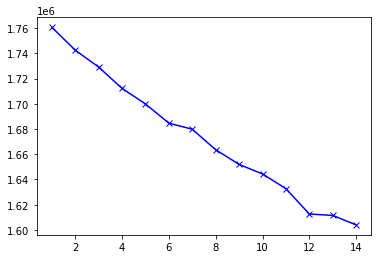

In [40]:
fig, ax = plt.subplots()
ax.plot(K, Sum_of_squared_distances, 'bx-')
plt.show()

In [43]:
kmeans = KMeans(n_clusters=6, random_state=0)
clusters = kmeans.fit_predict(X)

In [44]:
results = y_cat.to_frame()
results['clusters'] = clusters
pd.crosstab(results.all_engagement, results.clusters)

clusters,0,1,2,3,4,5
all_engagement,,,,,,
high,29,36,522,2,9,2
low,230,142,2515,12,75,17
med,147,127,2029,11,83,6
zero,536,274,4936,107,95,67


In [45]:
results['values'] = y

In [46]:
results.head()

,all_engagement,clusters,values
tid,,,
1361890179951296512,low,2,3.25
1358354354462289920,high,0,165.00
1363916379519336448,zero,0,0.00
1369296990782320648,med,2,31.00
1369559005811662851,zero,2,0.00


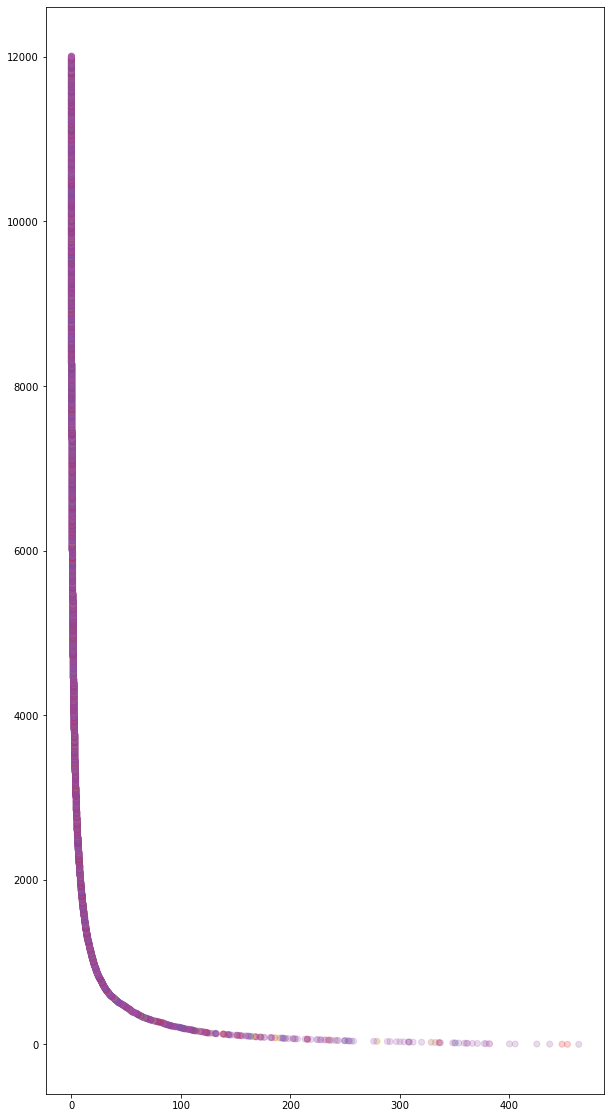

In [53]:
fig, ax = plt.subplots(figsize=(10,20))

plt.scatter(results['values'].sort_values(ascending=False).values, range(len(y)), cmap='Set1', c=results['clusters'], alpha=.2)
plt.show()

#### Gaussian Mixture

In [18]:
from sklearn.mixture import GaussianMixture

In [19]:
gmm = GaussianMixture(n_components=4, random_state=0)

In [20]:
gmm.fit(X)

GaussianMixture(n_components=4, random_state=0)

In [21]:
labels = gmm.predict(X)

In [22]:
results = y_cat.to_frame()
results['clusters'] = labels
results.head()

,all_engagement,clusters
tid,,
1361890179951296512,low,1
1358354354462289920,high,2
1363916379519336448,zero,2
1369296990782320648,med,2
1369559005811662851,zero,1


In [23]:
pd.crosstab(results.all_engagement, results.clusters)

clusters,0,1,2,3
all_engagement,,,,
high,163,146,277,14
low,874,893,1132,92
med,751,532,1055,65
zero,1740,1901,2169,205


#### ridge regression

In [36]:
from sklearn.linear_model import Ridge

In [37]:
param_distributions = dict(alpha = [.5, 1, 1.5])

ridge = Ridge()
clf = GridSearchCV(ridge, param_distributions, cv=3)
search = clf.fit(X, y)

In [38]:
search.cv_results_

{'mean_fit_time': array([0.04789257, 0.04601868, 0.0439291 ]),
 'std_fit_time': array([0.00075149, 0.00328111, 0.00418254]),
 'mean_score_time': array([0.00777141, 0.0089922 , 0.0089132 ]),
 'std_score_time': array([0.00250587, 0.00159214, 0.00348812]),
 'param_alpha': masked_array(data=[0.5, 1, 1.5],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.5}, {'alpha': 1}, {'alpha': 1.5}],
 'split0_test_score': array([0.024123  , 0.02412396, 0.02412491]),
 'split1_test_score': array([-0.00699023, -0.00698509, -0.00697995]),
 'split2_test_score': array([0.0349488 , 0.03495157, 0.03495434]),
 'mean_test_score': array([0.01736052, 0.01736348, 0.01736643]),
 'std_test_score': array([0.01777674, 0.01777543, 0.01777412]),
 'rank_test_score': array([3, 2, 1])}